In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [14]:
R = 40e6  #Ohm
C = 250e-12 #F

V_rep = -70e-3 #V
V_L = -50e-3   #V
V_redef = -65e-3   #V
V0 = V_rep  #V

tau_ref = 2e-3     #s
dt = 0.01e-3   #s
tmax = 25e-3    #s

t = np.arange(0, tmax, dt)
interacoes = round(tmax/dt)

In [15]:
def corrente(t, I):
    return I*(t>=0)


def trajetoria(S, I, sigma, delta_t):
    S[0] = 0

    for i in range(interacoes-1):
        w_n = random.gauss(0,1)
        S[i+1] = 1/2 * (S[i]**2) * (1 - delta_t) + (R*I[i] + V_rep)/R*C + sigma*w_n * np.sqrt(delta_t)

    return S

In [16]:
I = corrente(t, 300e-12)
S = np.zeros(interacoes)
sigma = 30e-3

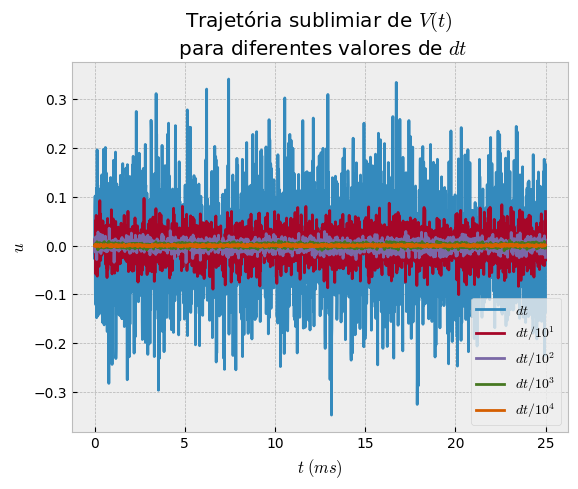

In [28]:
plt.style.use('bmh')

plt.figure()
plt.title('Trajetória sublimiar de $V(t)$ \n para diferentes valores de $dt$')

v = trajetoria(S, I, sigma, dt)
plt.plot(t*1e3,v*1e3, label=r'$dt$')

for i in range(1, 5):
    delta_t = dt * (10 ** -i)
    v = trajetoria(S, I, sigma, delta_t)
    plt.plot(t*1e3,v*1e3, label=rf'$dt / 10^{i}$')


plt.legend()
plt.xlabel(r'$t\;(ms)$')
plt.ylabel(r'$u$')

plt.show()